<b><h2> Importing Libraries </h2></b>

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning algorithms
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

# data splitter
from sklearn.model_selection import train_test_split, cross_val_score

# metrics to evaluate models results
from sklearn.metrics import classification_report, confusion_matrix

# grid search
from sklearn.model_selection import GridSearchCV

<b><h2> Visualizing the Data </h2></b>

In [2]:
# acquires the data
df = pd.read_csv('flowers.csv')

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


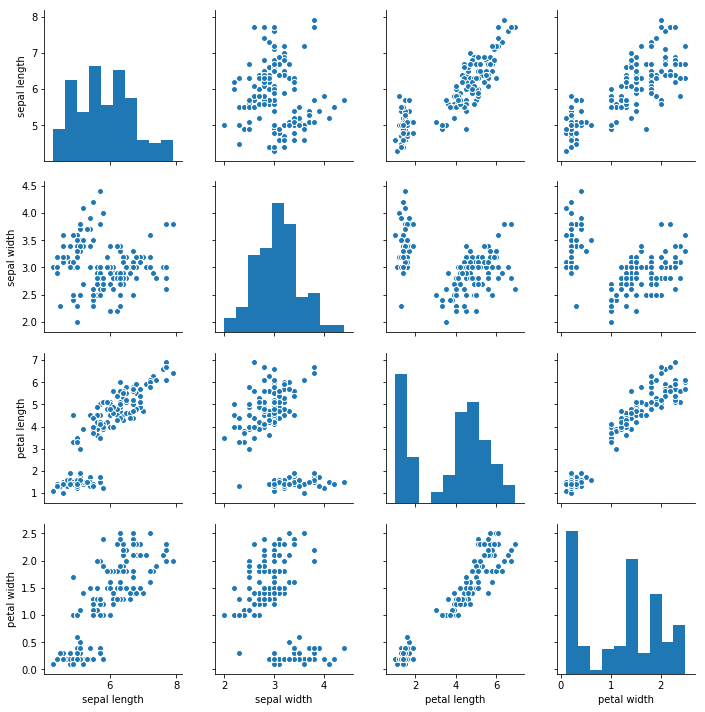

In [6]:
# scatter plots of the original data
sns.pairplot(df)

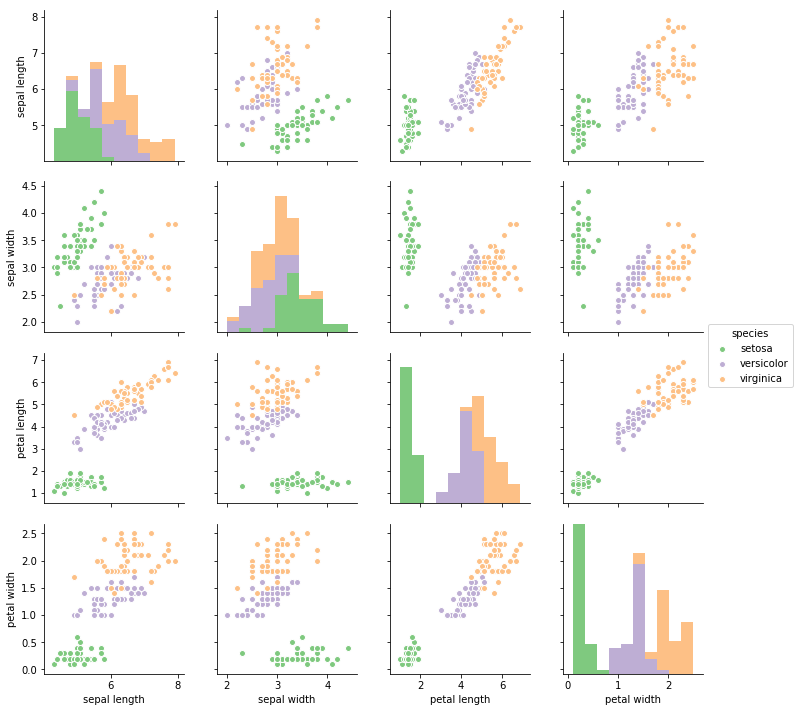

In [7]:
# scatter plots of the data coded with cluster membership, notice that setosa is further from both versicolor and virginica.
sns.pairplot(df, hue='species', palette='Accent')

Text(0.5,1,'Petal Length')

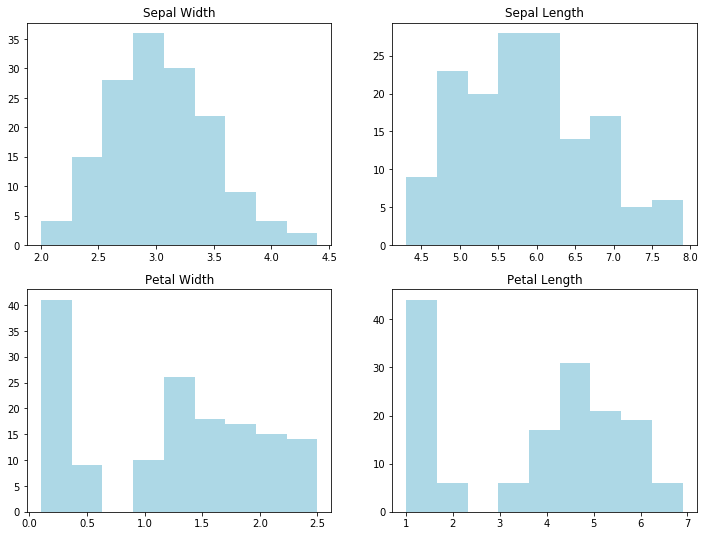

In [8]:
# The following plots are just other ways to represent what is already in this pairplot. I am doing this just in case 
# the pairplot is somehow not accepted

# another way to represent histograms
fig = plt.figure(figsize=(8, 6)) 
f, (axarr) = plt.subplots(2, 2, figsize=(12, 9))
axarr[0, 0].hist(df['sepal width'], bins=9, color='lightblue')
axarr[0, 0].set_title('Sepal Width')
axarr[0, 1].hist(df['sepal length'], bins=9, color='lightblue')
axarr[0, 1].set_title('Sepal Length')
axarr[1, 0].hist(df['petal width'], bins=9, color='lightblue')
axarr[1, 0].set_title('Petal Width')
axarr[1, 1].hist(df['petal length'], bins=9, color='lightblue')
axarr[1, 1].set_title('Petal Length')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261C3C73D30>,
      dtype=object)

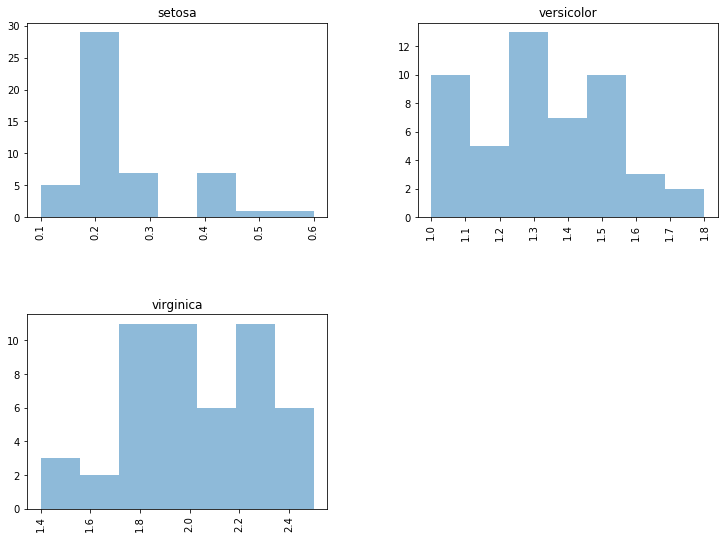

In [9]:
# another way to represent histograms, separated by species
df.hist(column='petal width', by='species', bins=7, figsize=(12,9), alpha=0.5)

Text(0.5,1,'Petal Width')

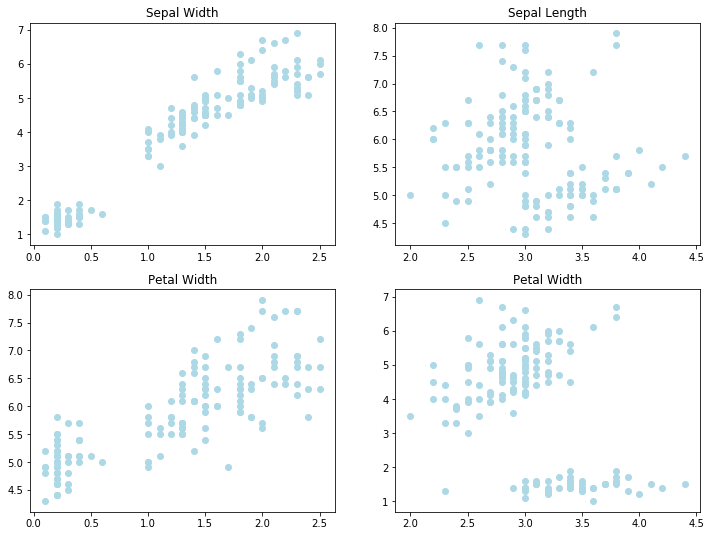

In [10]:
# another way to represent scatter plots
fig = plt.figure(figsize=(8, 6)) 
f, (axarr) = plt.subplots(2, 2, figsize=(12, 9))
axarr[0, 0].scatter(df['petal width'], df['petal length'], color='lightblue')
axarr[0, 0].set_title('Sepal Width')
axarr[0, 1].scatter(df['sepal width'], df['sepal length'], color='lightblue')
axarr[0, 1].set_title('Sepal Length')
axarr[1, 0].scatter(df['petal width'], df['sepal length'], color='lightblue')
axarr[1, 0].set_title('Petal Width')
axarr[1, 1].scatter(df['sepal width'], df['petal length'], color='lightblue')
axarr[1, 1].set_title('Petal Width')

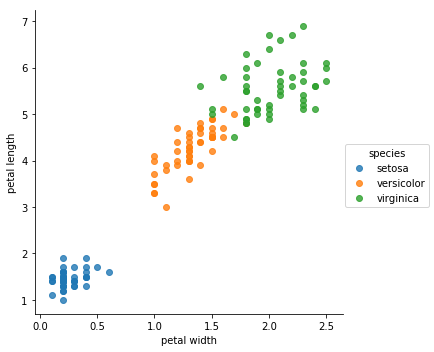

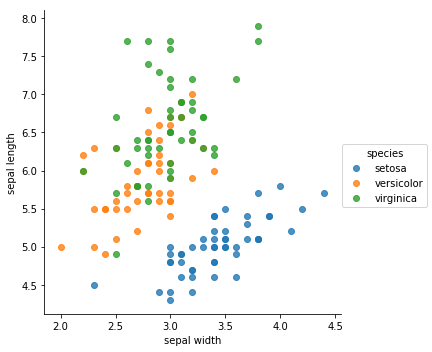

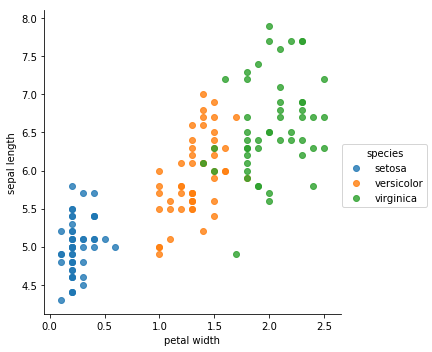

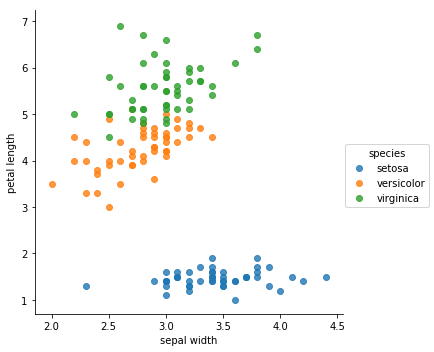

In [11]:
# another way to represent scatter plots by species
sns.lmplot(x='petal width', y='petal length', data=df, hue='species', fit_reg=False)
sns.lmplot(x='sepal width', y='sepal length', data=df, hue='species', fit_reg=False)
sns.lmplot(x='petal width', y='sepal length', data=df, hue='species', fit_reg=False)
sns.lmplot(x='sepal width', y='petal length', data=df, hue='species', fit_reg=False)

<b><h2> Splitting the Data </h2></b>

In [12]:
X = df.drop('species', axis=1) # independent variables
y = df['species'] # dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) # splits the data into random train and test subsets

<b><h2> Training the Models </h2></b>

We have some ways to analyze our models, here I'll use both train/test split and K-fold cross-validation. Only one of those would be enough. I prefer the K-fold CV as it is more complete by considering different train and test sets and averaging them. Train/test split gives to many different results (because it is random), but it is good to build a confusion matrix and classification report.

<b> K Nearest Neighbour </b>

Text(0,0.5,'Error Rate')

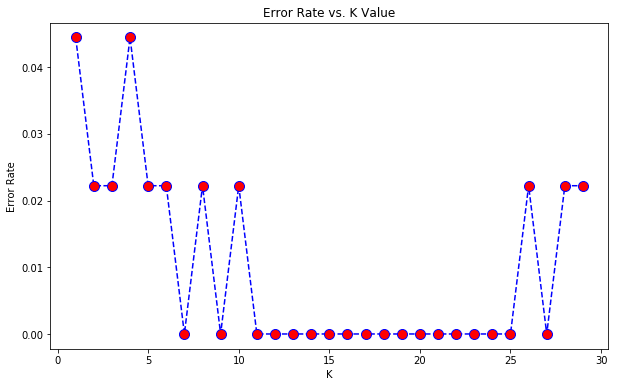

In [13]:
# elbow method to choose a good K value
error_rate = [] # error rate of different K values
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k) # creates a KNN model using 1, 2...29, 30 as K value
    knn.fit(X_train, y_train) # trains the model
    knn_pred = knn.predict(X_test) # uses test set to evaluate our model
    error_rate.append(np.mean(knn_pred != y_test)) # appends the error rate as average where model wrongly predicted

# creates a plot to better visualize K values and its error rate
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0,0.5,'Accuracy')

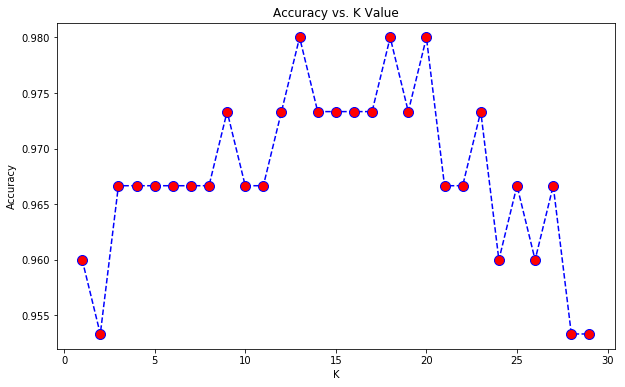

In [14]:
# K-folds cross-validation and elbow method to choose a good K value, this could be done above, but I did here to keep it separated
k_scores = [] # accuracy scores of different K values
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k) # creates a KNN model using 1, 2...29, 30 as K value
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') # calculates accuracy using K-folds CV
    k_scores.append(scores.mean()) # appends the accuracy score as average of K-folds CV

# creates a plot to better visualize K values and its accuracy
plt.figure(figsize=(10,6))
plt.plot(range(1,30), k_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [15]:
# we have K=20 as a good K value because of its accuracy and bias-variance tradeoff 
knn = KNeighborsClassifier(n_neighbors=20) # creates a KNN model using 20 as K value
acc_knn = cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean() # calculates accuracy using K-folds CV
knn.fit(X_train, y_train) # trains the model
knn_pred= knn.predict(X_test) # uses the test set to evaluate our model

print("Accuracy:", acc_knn, '\n')
print(confusion_matrix(y_test, knn_pred)) # model's confusion matrix based on its predictions and the test set
print(classification_report(y_test, knn_pred)) # model's classification report based on its predictions and the test set

Accuracy: 0.9800000000000001 

[[12  0  0]
 [ 0 21  0]
 [ 0  0 12]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      1.00      1.00        21
  virginica       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        45



<b> Support Vector Machine Classifier </b>

In [16]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} # some C and gamma parameters for SVC
svc_grid = GridSearchCV(SVC(), param_grid, refit=True) # grid search finds optimal SVC's parameters. It becomes a SVC. (verbose=2 to analyze)
acc_svc_grid = cross_val_score(svc_grid, X, y, cv=10, scoring='accuracy').mean() # calculates accuracy using K-folds CV
svc_grid.fit(X_train, y_train) # trains the model with the best parameters found
svc_pred = svc_grid.predict(X_test) # uses the test set to evaluate our model

print("Accuracy:", acc_svc_grid, '\n')
print(confusion_matrix(y_test, svc_pred)) # model's confusion matrix based on its predictions and the test set
print(classification_report(y_test, svc_pred)) # model's classification report based on its predictions and the test set

Accuracy: 0.9600000000000002 

[[12  0  0]
 [ 0 21  0]
 [ 0  0 12]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      1.00      1.00        21
  virginica       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        45



<b> Gaussian Naive Bayes </b>

In [17]:
# as the histograms shown in the pairplot above are relatively normal, we will use
# the "Gaussian" Naive Bayes instead of another NB classifier
gaussianNB = GaussianNB() # creates Gaussian NB model
acc_gaussianNB = cross_val_score(gaussianNB, X, y, cv=10, scoring='accuracy').mean() # calculates accuracy using K-folds CV
gaussianNB.fit(X_train, y_train) # trains the model
gaussianNB_pred = gaussianNB.predict(X_test) # uses the test set to evaluate our model

print("Accuracy:", acc_gaussianNB, '\n')
print(confusion_matrix(y_test, gaussianNB_pred)) # model's confusion matrix based on its predictions and the test set
print(classification_report(y_test, gaussianNB_pred)) # model's classification report based on its predictions and the test set

Accuracy: 0.9533333333333334 

[[12  0  0]
 [ 0 21  0]
 [ 0  1 11]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       0.95      1.00      0.98        21
  virginica       1.00      0.92      0.96        12

avg / total       0.98      0.98      0.98        45



<b> Logistic Regression </b>

In [18]:
log = LogisticRegression() # creates the Logistic Regression model
acc_log = cross_val_score(log, X, y, cv=10, scoring='accuracy').mean() # calculates accuracy using K-folds CV
log.fit(X_train, y_train) # trains the model
log_pred = log.predict(X_test) # uses test set to evaluate our model

print("Accuracy:", acc_log, '\n')
print(confusion_matrix(y_test, log_pred)) # model's confusion matrix based on its predictions and the test set
print(classification_report(y_test, log_pred)) # model's classification report based on its predictions and the test set

Accuracy: 0.9533333333333334 

[[12  0  0]
 [ 0 15  6]
 [ 0  0 12]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       1.00      0.71      0.83        21
  virginica       0.67      1.00      0.80        12

avg / total       0.91      0.87      0.87        45



<b> Random Forest Classifier </b>

In [19]:
rfc = RandomForestClassifier(n_estimators=100) # creates a Random Forest Classifier model with 100 trees
acc_rfc = cross_val_score(rfc, X, y, cv=10, scoring='accuracy').mean() # calculates accuracy using K-folds CV
rfc.fit(X_train, y_train) # trains the model
rfc_pred = rfc.predict(X_test) # uses the test set to evaluate our model

print("Accuracy:", acc_rfc, '\n')
print(confusion_matrix(y_test, rfc_pred)) # model's confusion matrix based on its predictions and the test set
print(classification_report(y_test, rfc_pred)) # model's classification report based on its predictions and the test set

Accuracy: 0.96 

[[12  0  0]
 [ 0 21  0]
 [ 0  1 11]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       0.95      1.00      0.98        21
  virginica       1.00      0.92      0.96        12

avg / total       0.98      0.98      0.98        45



<b> Perceptron </b>

In [20]:
perceptron = Perceptron(max_iter=100) # creates a Perceptron model with 100 passes over the training data
acc_perceptron = cross_val_score(perceptron, X, y, cv=10, scoring='accuracy').mean() # calculates accuracy using K-folds CV
perceptron.fit(X_train, y_train) # trains the model
perceptron_pred = perceptron.predict(X_test) # uses the test set to evaluate our model

print("Accuracy:", acc_perceptron, '\n')
print(confusion_matrix(y_test, perceptron_pred)) # model's confusion matrix based on its predictions and the test set
print(classification_report(y_test, perceptron_pred)) # model's classification report based on its predictions and the test set

Accuracy: 0.6666666666666667 

[[12  0  0]
 [ 1 20  0]
 [ 0  8  4]]
             precision    recall  f1-score   support

     setosa       0.92      1.00      0.96        12
 versicolor       0.71      0.95      0.82        21
  virginica       1.00      0.33      0.50        12

avg / total       0.85      0.80      0.77        45



<b><h2> Conclusion </h2></b>

Overall, all models (ecxept perceptron) performed well. Our models' scores are:


In [21]:
models = pd.DataFrame({
    'Model': ['Support Vector Machine Classifier', 'Gaussian Naive Bayes', 'K Nearest Neighbors', 
              'Logistic Regression', 'Random Forest Classifier', 'Perceptron'],
    'Score': [acc_svc_grid, acc_gaussianNB, acc_knn, acc_log, acc_rfc, acc_perceptron]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,K Nearest Neighbors,0.980000
0,Support Vector Machine Classifier,0.960000
4,Random Forest Classifier,0.960000
1,Gaussian Naive Bayes,0.953333
3,Logistic Regression,0.953333
5,Perceptron,0.666667


As K Nearest Neighbors had the best score, we will choose it as the best model, consequently, we will train it using all our data, so that we don't waste any data for a possible future new prediction.

In [22]:
knn = KNeighborsClassifier(n_neighbors=20) # creates a KNN model using 20 as K value
knn.fit(X, y) # trains the model with all the data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')